## Data Wrangling Project

    This notebook contains solution for Data Wrangling of Twitter's WeRateDogs tweet archive.
    
### Table Of Content
 + Introduction
 + Gathering Data
 + Assessing Data
 + Cleaning Data
 + Data Exploration
 
 ### Introduction
 
>Data wrangling is process of getting data ready for analysis and visualization. It is an iterative process with 3 stages. We can iterate through gathering,assessing and cleaning to get good quality data for analysis. So let's start with importing necessary libraries.

> Since we also have to analyse the dataset we'll need some questions to focus on. Provided data conatains information such as tweets containing ratings of the dogs, retweet counts and favorite count of tweets. On the bases of that we can generate some questions for data visualisation. We'll do this later after gathering our data.


In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
import tweepy
from timeit import default_timer as timer
import json

filterwarnings("ignore")

### Gathering 

+ In this step we'll fetch data from various resources using in built in python functionalities , internet and Twitter's developer API. First we have `twitter-archive-enhanced.csv`, Which i have already downloaded from link provided in project description.
 
+ Our second source of data is `image-predictions.tsv` which is tab-separeted-values file which conatains breed  of every dog in row wise. To download this file from we'll use python's `requests` library to fetch file data from udacity's servers and then we'll use pythons file i/o functions to write content of data we recieved into a local tsv file.


In [2]:
from requests import get
req = get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("./image-predictions.tsv","wb+") as file:
    file.write(req.content)
    
df_1 = pd.read_csv("./twitter-archive-enhanced.csv")
df_2 = pd.read_csv("./image-predictions.tsv",sep="\t")

Now we'll use Twitter's developer API to fetch more data on every tweets. We have tweet id for every tweet we'll use them to get tweet information from API and store it into a local file. Then we'll create a a dataframe containing  `retweet_count` and `favorite_count`.

In [ ]:
twitter_cred = json.load(open("../twitter_cred.json","r"))


consumer_key = twitter_cred['consumer_key']
consumer_secret= twitter_cred['consumer_secret']
access_token = twitter_cred['access_token']
access_token_secret = twitter_cred['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values

count = 0
fails_dict = {}

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass

print(fails_dict)


Note : I restarted kernal before submission so i haven't executed cell above , because it will take alot of time again.

In [3]:
tweet_json_file = open("./tweet_json.txt","r").read().split("\n")

In [4]:
tweets = []

for tweet in tweet_json_file:
    try:
        Json = json.loads(tweet)
        tweets.append([Json['id'],Json['retweet_count'],Json['favorite_count']])
    except:
        print (tweet)    

In [5]:
df_3 = pd.DataFrame(tweets,columns=['tweet_id','retweet_count','favorite_count'])

Now that we have our data from all out resources we define some questions based on the data we gather as we discussed before. Questions Such as

1. Which breed is likely get more ratings comnapred to other ?
2. Is there any relation between rating and retweet count or favorite count ?
3. Is breed and retweet count/favorite count somehow related ?

We'll answer these questions once we had how data cleaned and ready for analysis. First we have to asses our data.

### Assessment

+ Assessing data means inspecting it and checking for quality and tidiness issues. We're all familiar with quality issues such as missing data or wrong data types. But tidiness of id defined by it's structure. 

+ There are 3 aspects to keep in mind while cheking for tidiness in data. 

    1. **Each variable forms a Column**
    2. **Each observation forms a Row**
    3. **Each obervational unit forms a Table**
    

+ First  we'll go with visual assessment of the data. We'll find issues with our data and categorize them by Quality issues and Tidiness Issues.


In [6]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


+ Now we'll go with programatic assesment to find out dirt in our data.

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Let's run value_counts function on ratings columns in df_1 to make sure we got the rating right.

In [12]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Looks like we got a hit.

Let's check if 'doggo', 'floofer', 'pupper' and 'puppo' contains values other that respective category or not ? 

In [14]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    print (df_1[col].value_counts())
    print ("\n\n")

None     2259
doggo      97
Name: doggo, dtype: int64



None       2346
floofer      10
Name: floofer, dtype: int64



None      2099
pupper     257
Name: pupper, dtype: int64



None     2326
puppo      30
Name: puppo, dtype: int64





In [15]:
df_1.query("doggo == 'None' and floofer=='None' and pupper=='None'  and puppo=='None' ").shape

(1976, 17)

Let's check for rows containing multiple dog categories.

In [16]:
rows = []

for i in df_1[[ 'doggo', 'floofer', 'pupper','puppo']].values:
    if i.tolist().count("None") < 3:
        rows.append(i)
        
rows

[array(['doggo', 'None', 'None', 'puppo'], dtype=object),
 array(['doggo', 'floofer', 'None', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object),
 array(['doggo', 'None', 'pupper', 'None'], dtype=object)]

Let's check if any of the possibility is missplaced in Dataframe 2.

In [17]:
df_2.query("p1_conf < p2_conf").shape,df_2.query("p2_conf < p3_conf").shape

((0, 12), (0, 12))

From a little visual assesment i found that predictions columns contain values other than dog breeds such as laptops , mug and other accessories.

In [18]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

### Issues : 
#### Quality

##### Dataframe 1

+ Well first of all we have a lot of null values in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp columns.
+ Timestamp column values have **+0000** in the end.
+ Values in source columns are in form of a HTML tag.
+ Some entries in expanded_url contains multiple urls for same post.
+ Four columns that categorises dogs as 'doggo', 'floofer', 'pupper' and 'puppo' values in None and respective category, it should be in 1/0 or yes/no.
+ Some rows have multiple dog categories.
+ Value of rating_denominator should be 10 according to rating system.
+ Value of rating_numerator should be 10 or greater than 10 according to rating system.
+ There too many rows which has 'doggo', 'floofer', 'pupper' and 'puppo', all four values as None.

#### Dataframe 2

+ Dog type columns have ' **_** ' in value. They should be presented as [Title String](https://docs.python.org/3/library/stdtypes.html#str.title).


One of the other issues to consider is all 3 dataframes have different number of rows and unncessary columns. 

#### Tidiness

##### Dataframe 1

+ Dogs are categorised as 'doggo', 'floofer', 'pupper' and 'puppo' in four different columns.
+ Timestamp columns contains both time and date variables.

#### Dataframe 2

+ Three columns for dog breed.
+ Inaccurate Prediction in all three columns.

Dataframe 3 don't have either Quality or Tidiness issues.

Looks like we're done with assesing data both programatically and visually. Now it's time clean our data.

### Cleaning

Firstly let's create dataframe copies.

In [19]:
df1 = df_1.copy()
df2 = df_2.copy()
df3 = df_3.copy()

Now let's get started with our cleaning.

We'll  iterate through three steps 
1. Define
2. Code
3. Test


#### Define

+ First of all we have a lot of columns with too many null values which are not necessary in our analysis so we'll first drop those columns.

#### Code

In [20]:
df1 = df1.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [21]:
df1.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Define 

+ Remove **+0000** from the end of the timestamp and separate time and date columns.

#### Code

In [22]:
df1['timestamp'] = df1.timestamp.apply(lambda x:x.strip(" +0000"))
df1['date'] = df1.timestamp.apply(lambda x:x.split(" ")[0])
df1['time'] = df1.timestamp.apply(lambda x:x.split(" ")[1])
df1 = df1.drop(columns=['timestamp'])

#### Test

In [23]:
df1.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


#### Defince

+ Extract source from html tag in source column.

#### Code

In [24]:
df1['source'] = df1.source.apply(lambda x:x.split(">")[1].strip("</a"))

#### Test

In [25]:
df1.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define 

+ Extract only one url from expanded_urls.

#### Code

In [26]:
df1['expanded_urls'] = df1.expanded_urls.apply(lambda x:x.split(",")[0] if type(x) != float else x)

#### Test

In [27]:
df1.expanded_urls.apply(lambda x:len(x.split(",")) if type(x) != float else 1).value_counts()

1    2356
Name: expanded_urls, dtype: int64

#### Define

+ Handle rows multiple dog categories by using first occuring categoryand and then Merge doggo, floofer, pupper and puppo columns into single column.

#### Code

In [28]:
rows = []

for i in df_1[[ 'doggo', 'floofer', 'pupper','puppo']].values:
    row = [j for j in i if j != "None"]
    if len(row) >0:
        rows.append(row[0])
    else:
        rows.append(np.nan)
        
df1['category'] = rows

In [29]:
df1 = df1.drop(columns=['doggo', 'floofer', 'pupper' ,'puppo'])

#### Test

In [30]:
df1.category.value_counts()

pupper     245
doggo       97
puppo       29
floofer      9
Name: category, dtype: int64

#### Define

+ Get right values for rating_denominator and rating_numerator from text provided in the tweet.

#### Code

In [31]:
temp_df = df1[['text','rating_denominator','rating_numerator']].query("rating_denominator != 10 or rating_numerator < 10")

In [32]:
temp_df.text.apply(lambda x:[i for i in x.split(" ") if "/" in i and "http" not in i]).apply(lambda x: x if len(x) > 1 else "").value_counts()

                   442
[8/10, 11/10]        2
[9/11, 14/10.]       2
[960/00, 13/10]      1
[7/11, 10/10]        1
[5/10, 10/10]        1
[4/10, 13/10]        1
[9/10, 2/10]         1
[w/out, 3/10]        1
[50/50., 11/10]      1
[4/20, 13/10]        1
[1/2, 9/10]          1
[7/10, 8/10]         1
[5/10, 8/10]         1
Name: text, dtype: int64

Now we know why why rating values have inaccurate values. Some the tweets contains other numeric values then ratings so algorithm may have been confused. Since ratings are given in the end of tweet we'll consider second values from arrays to improve rating columns. 

In [33]:
def get_rating(x):
    t = x
    x = [i for i in x.split(" ") if "/" in i and "http" not in i]
    ratings = []
    if len(x) == 1:
        try:
            ratings = [int(i.split(".")[0]) for i in x[0].split("/")]
        except:
            ratings = [np.nan,np.nan]
    elif len(x) == 2:
        try:
            ratings =  [int(i.split(".")[0]) for i in x[1].split("/")]
        except:
            ratings = [np.nan,np.nan]
            
    if len(ratings) == 0:
        get_rating(t.split("\n"))
        
    return ratings[:2]

numerator,denominator,index = [],[],[]
a = 0

for i in df1.index:
    index.append(i)
    try:
        x,y = get_rating(df1.loc[i].text)
        numerator.append(x)
        denominator.append(y)
        a+=1
    except:
        try:
            x,y = get_rating(df1.loc[i].text.split("\n")[0])
            numerator.append(x)
            denominator.append(y)
            a += 1
        except:
            x,y = get_rating(df1.loc[i].text.split(".")[0])
            numerator.append(x)
            denominator.append(y)
            a+=1


In [34]:
df1 = df1.drop(columns=['rating_numerator','rating_denominator'])

In [35]:
df1 = df1.join(pd.DataFrame({"rating_numerator":numerator,"rating_denominator":denominator}))

In [36]:
df1.query("rating_denominator > 10")

,tweet_id,source,text,expanded_urls,name,date,time,category,rating_numerator,rating_denominator
342,832088576586297345,Twitter for iPhone,@docmisterio account started on 11/15/15,NaN,None,2017-02-16,04:45:5,NaN,11.0,15.0
433,820690176645140481,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,None,2017-01-15,17:52:4,NaN,84.0,70.0
902,758467244762497024,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,None,2016-07-28,01:00:57,NaN,165.0,150.0
1120,731156023742988288,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,this,2016-05-13,16:15:54,NaN,204.0,170.0
1228,713900603437621249,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,None,2016-03-27,01:29:02,NaN,99.0,90.0
1254,710658690886586372,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,None,2016-03-18,02:46:49,NaN,80.0,80.0
1274,709198395643068416,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,None,2016-03-14,02:04:08,NaN,45.0,50.0
1351,704054845121142784,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,a,2016-02-28,21:25:3,NaN,60.0,50.0
1433,697463031882764288,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,None,2016-02-10,16:51:59,NaN,44.0,40.0
1598,686035780142297088,Twitter for iPhone,Yes I do realize a rating of 4/20 would've bee...,NaN,None,2016-01-10,04:04:1,NaN,4.0,20.0


Yet we have rows with `rating_denominator` greater than 10. It is because of in these cases `WeRateDogs` have rated more than one dogs in single picture. 

For example

![example](./example.PNG "Logo Title Text 1")

Let's handle these values.

In [37]:
df1['rating_devisor'] = df1.rating_denominator.apply(lambda x:x/10) 

In [38]:
df1['rating_denominator'] = df1.rating_denominator / df1.rating_devisor
df1['rating_numerator'] = df1.rating_numerator / df1.rating_devisor

In [39]:
df1.query("rating_denominator > 10")

,tweet_id,source,text,expanded_urls,name,date,time,category,rating_numerator,rating_denominator,rating_devisor


Phewww..., That took a lot of effort. But now we have proper ratings.

#### Define

+ Consider breed column with highest confidence , remove ' _ ' and represent them as Title String.

#### Code

In [40]:
df2['breed'] = df2.p1.apply(lambda x:x.replace("_"," ").title())
df2 = df2.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [41]:
sum(["_" in i for i in df2.breed.value_counts().index])

0

#### Define 

+ Replace inaccurate predictions from breed column with `other` catgories.

+ I'm using [Dog API](https://dog.ceo/) to fetch all dog breeds and then convert it into a array to use.

In [42]:
dogs = json.loads(get("https://dog.ceo/api/breeds/list/all").text)['message']
dogos = []

for i in dogs:
    for j in dogs[i]:
        dogos.append((j+" "+i).title())
        dogos.append(j)

    dogos += i.title().split(" ")

In [43]:
def get_breed(x):
    for i in x.split(" "):
        if i in dogos:
            return x
    return "Other"

df2['breed'] = df2['breed'].apply(get_breed)

#### Define

+ Merge Dataframes.

But before merging columns we'll need ro sort the columns on `tweet_id` and find out common ids to merge them into one final dataset.

#### Code

In [44]:
df1.shape,df2.shape,df3.shape

((2356, 11), (2075, 4), (2354, 3))

We'll consider ids from df2, because it contains `breed` column and has least number of rows.

In [45]:
df_main = df2.set_index('tweet_id').join(df3.set_index('tweet_id'))
df_main = df_main.join(df1.set_index('tweet_id'))

#### Test

In [46]:
cols1 =df_main.columns.values.tolist()

cols2 = [i for i in  df1.columns.values.tolist() + df2.columns.values.tolist() + df3.columns.values.tolist() if i  != "tweet_id"]
cols1.sort(),cols2.sort()

cols1 == cols2

True

In [47]:
df_main.head()

,jpg_url,img_num,breed,retweet_count,favorite_count,source,text,expanded_urls,name,date,time,category,rating_numerator,rating_denominator,rating_devisor
tweet_id,,,,,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,532.0,2535.0,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,None,2015-11-15,22:32:08,NaN,8.0,10.0,1.0
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,48.0,132.0,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,2015-11-15,23:05:3,NaN,7.0,10.0,1.0
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Other,47.0,128.0,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,2015-11-15,23:21:54,NaN,9.0,10.0,1.0
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,147.0,311.0,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,2015-11-16,00:04:52,NaN,6.0,10.0,1.0
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,41.0,111.0,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,2015-11-16,00:24:5,NaN,5.0,10.0,1.0


### Exploration

#### Now let's get back to our questions.

1. Which breed is likely get more ratings compared to other ?
2. Is there any relation between rating and retweet count or favorite count ?
3. Is breed and retweet count/favorite count somehow related ?
4. Platform with most tweets came from?

And some simple visualisations like count charts and scatterplots.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's find what type of category has most number of occurences.

Text(0.5, 1.0, 'Dog Categories')

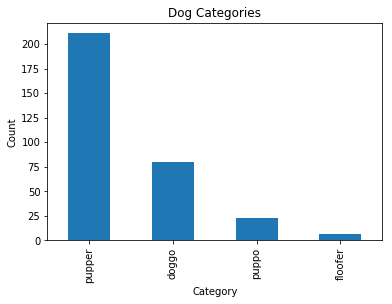

In [49]:
df_main.category.value_counts().plot.bar()
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Dog Categories")

So puppers huh ?, yet we have a lot of null values in that column so we can not be sure as this is only a sample of data.

Now let's plot dog breeds to find out most tweeted breed on we rate dogs.

Text(0.5, 1.0, 'Number of occurencess according to Breed')

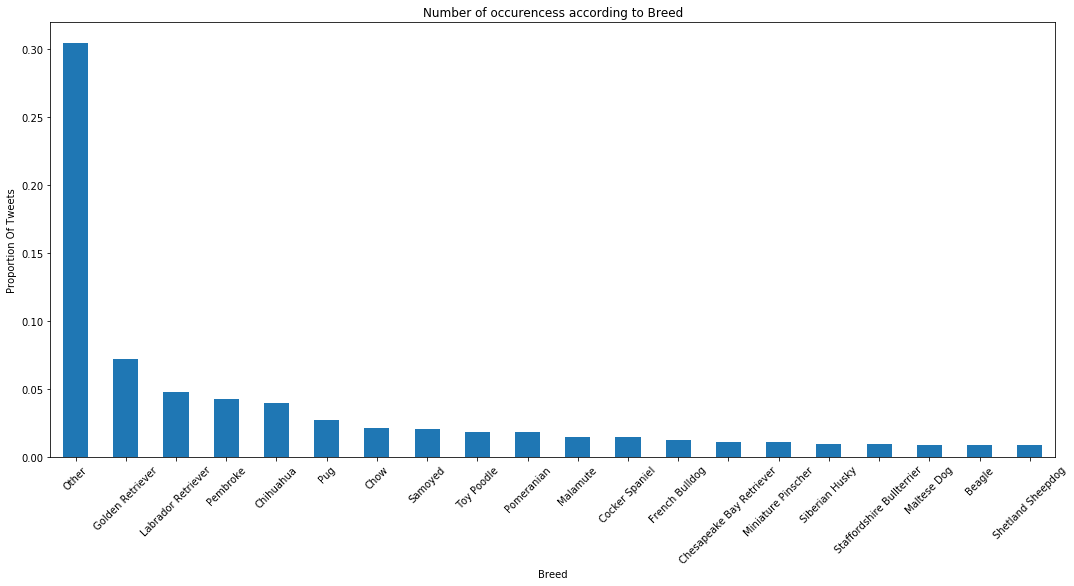

In [59]:
plt.figure(figsize=(18,8))
temp = df_main.breed.value_counts().sort_values(ascending=False)/sum(df_main.breed.value_counts())
temp.head(20).plot.bar()
plt.xlabel("Breed")
plt.ylabel("Proportion Of Tweets")
plt.xticks(rotation=45)
plt.title("Number of occurencess according to Breed")

So we have `Golden Retriever` as most tweeted dog breed on WeRateDogs. Then we have `Labrador Retriever`,`Pembroke` and `Chihuahua`.

Now let's count sources of tweets.

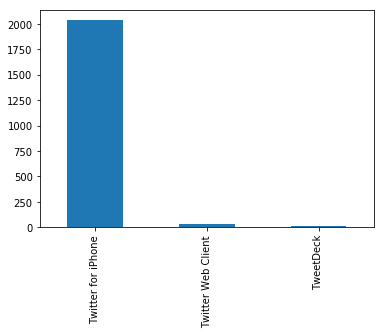

In [51]:
df_main.source.value_counts().plot.bar()

😬, Now we know that admin of the WeRateDogs uses iPhone ,😂😂😂.

#### Which breed is likely get more ratings compared to other ?

+ We know that Golden retriever is th most tweetes dog breed on WeRateDogs, So we'll use average of the tweets to find out which breed gets more rating compared to other.

In [52]:
group = df_main[['breed','rating_numerator']].groupby("breed").mean()

Text(0.5, 1.0, 'Rating Averages According To Breeds')

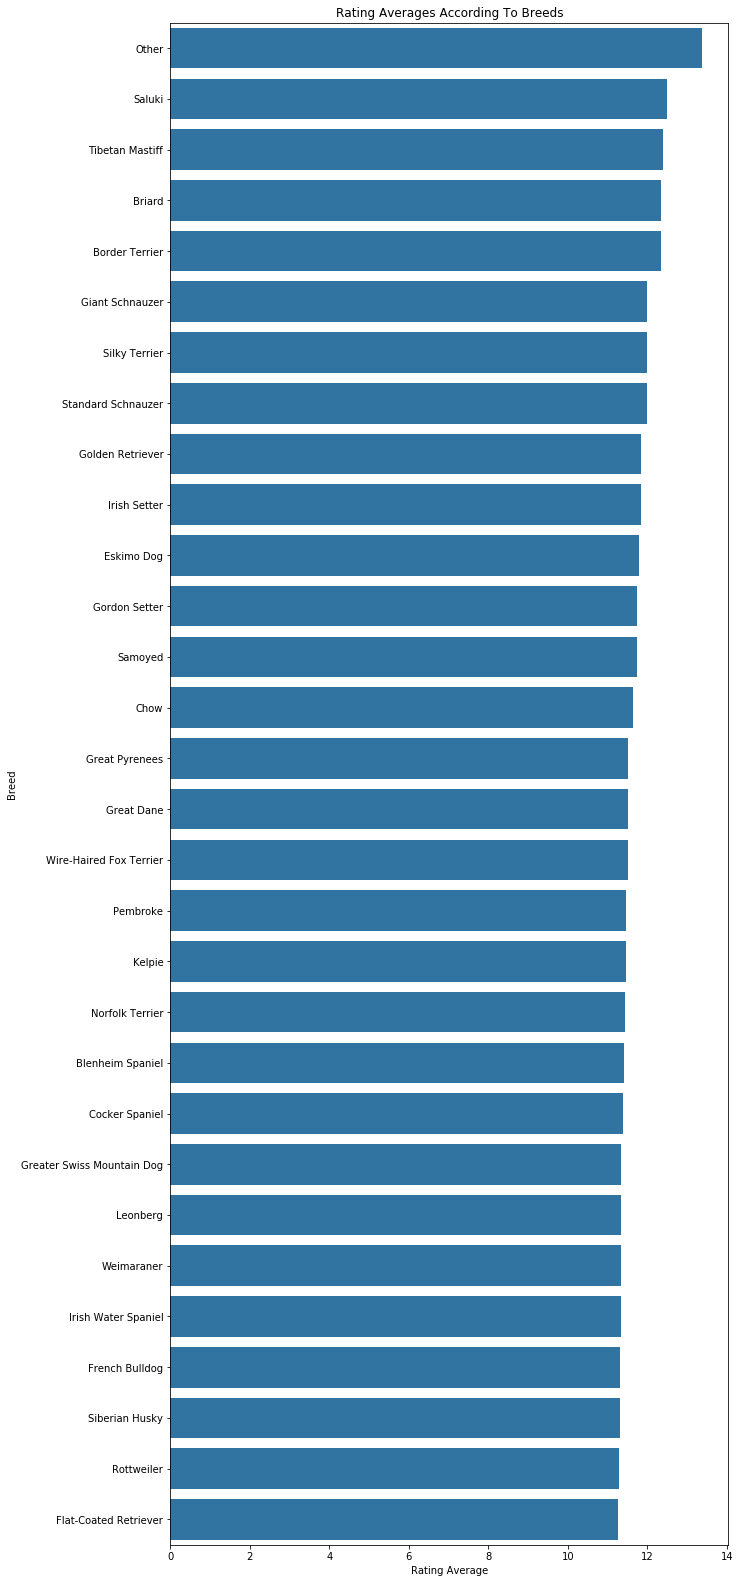

In [53]:
plt.figure(figsize=(10,28))
color = sns.color_palette()[0]
tdf = group.sort_values("rating_numerator",ascending=False).head(30)
sns.barplot(tdf['rating_numerator'],tdf.index,color=color)
plt.xlabel("Rating Average")
plt.ylabel("Breed")
plt.title("Rating Averages According To Breeds",fontdict={"size":12})

So there is not much difference in ratings, After all they are good dogs.

Now time for our second question.

### Is there any relation between rating and retweet count or favorite count ?

Text(0, 0.5, 'Favorite Count')

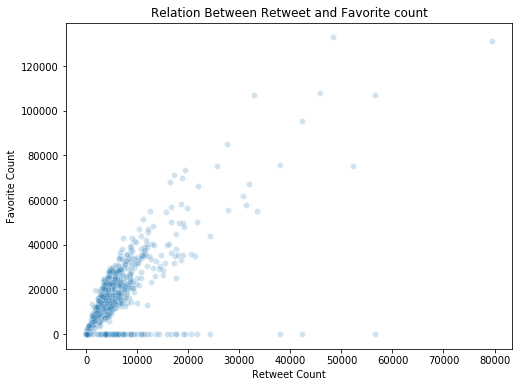

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot('retweet_count','favorite_count',data=df_main,alpha=0.2)
plt.title("Relation Between Retweet and Favorite count")
plt.xlabel("Retweet Count")
plt.ylabel("Favorite Count")

It is a linear relationship with a hell lot of outliers. But for now we can say that Retweets and favorites are related.

### Is breed and retweet count/favorite count somehow related ?

To find this out we'll use mean of both counts.

In [55]:
group = df_main[['breed','retweet_count','favorite_count']].groupby("breed").mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

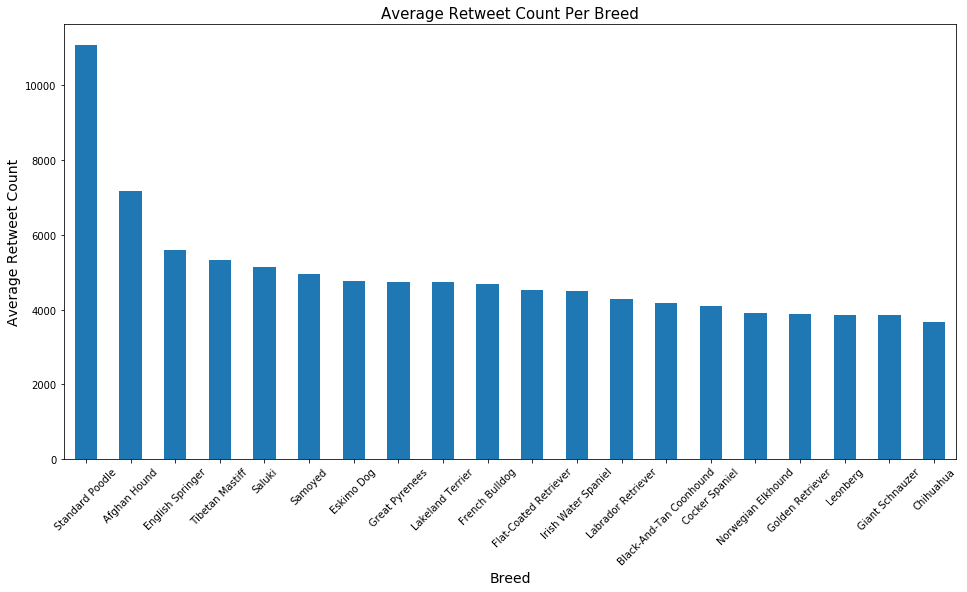

In [56]:
plt.figure(figsize=(16,8))
tdf = group['retweet_count'].sort_values(ascending=False).head(20)
tdf.plot.bar()
plt.xlabel("Breed",fontdict={"size":14})
plt.ylabel("Average Retweet Count",fontdict={"size":14})
plt.title("Average Retweet Count Per Breed",fontdict={"size":15})
plt.xticks(rotation=45)

Looks like `Standard Poodle` gets more retweets compared to other breeds. `Afghan Hound` is a little lower but after that every breed almost have same number of Average Retweet Count.

Let's check for favorite count.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

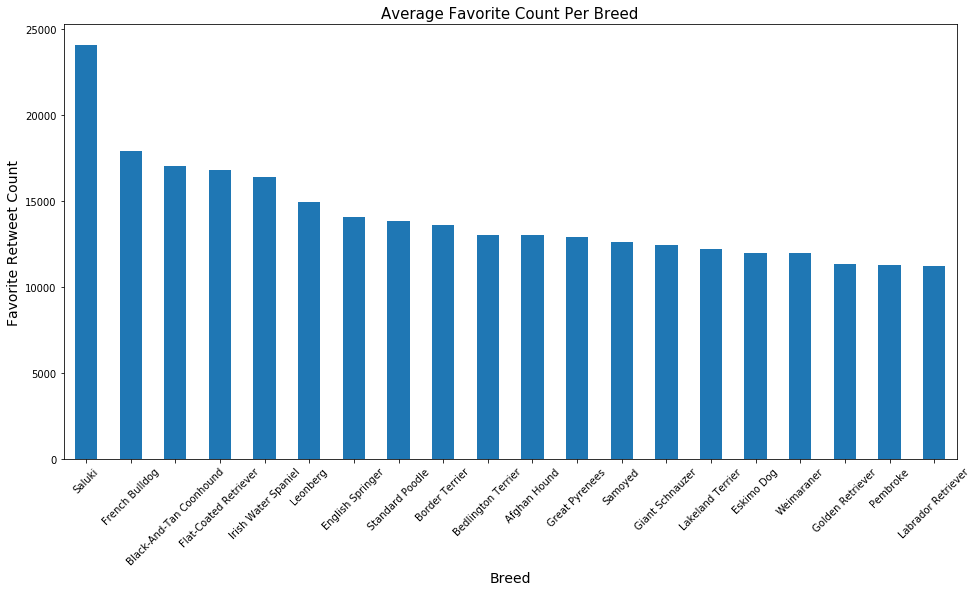

In [60]:
plt.figure(figsize=(16,8))
tdf = group['favorite_count'].sort_values(ascending=False).head(20)
tdf.plot.bar()
plt.xlabel("Breed",fontdict={"size":14})
plt.ylabel("Favorite Retweet Count",fontdict={"size":14})
plt.title("Average Favorite Count Per Breed",fontdict={"size":15})
plt.xticks(rotation=45)

It seems the outliers in Scatter plot effected here, In Average Retweet per breed count we had standard poodle with maximum average. But here we have `Saluki` but standard poodle is nowhere to be found in top 10.

Now let's save our master dataset.

In [58]:
df_main = df_main.drop(columns=['rating_devisor'])
df_main.to_csv("twitter_archive_master.csv.")

## Conclusion

+ Throughout this project we gathered data from various sources, Assessed it visually and programatically and Cleaned it using python's inbuilt functionality and pandas.

+ We also used an external source of data for retriving all breeds of dogs to filter out non dog breed values.

+ Then using some visualizations we found out that
    1. Puppers have most number of occurences in tweets.
    2. Golden Retriever is most tweeted breed.
    3. Every breed gets almost same ratings.
    4. Retweets and Favourite counts are related with some outliers.
    5. Stadndard poodle has the highest average retweet count.
    6. And Saluki has the highest average favourite count.
   
And always remember, They are good dogs 😉.